In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np

import acquire as a
import prepare as p

In [2]:
df = a.get_titanic_data()
df_train, validate, test = p.split_titanic_data(df)
df_train

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
153,0,3,40.5,0,2,14.5000,0,1,0,1
147,0,3,9.0,2,2,34.3750,0,0,0,1
854,0,2,44.0,1,0,26.0000,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
322,1,2,30.0,0,0,12.3500,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
281,0,3,28.0,0,0,7.8542,1,1,0,1
111,0,3,14.5,1,0,14.4542,0,0,0,0
885,0,3,39.0,0,5,29.1250,0,0,1,0
786,1,3,18.0,0,0,7.4958,1,0,0,1


In [3]:
df_train.survived.value_counts()

0    237
1    162
Name: survived, dtype: int64

##### Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

1. 

What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.


In [4]:
# get the most common value in survived
baseline_prediction = df_train.survived.value_counts().idxmax()
baseline_model = pd.Series([baseline_prediction for x in range(df_train.shape[0])])
baseline_model

0      0
1      0
2      0
3      0
4      0
      ..
394    0
395    0
396    0
397    0
398    0
Length: 399, dtype: int64

In [5]:
pd.DataFrame(metrics.classification_report(df_train.survived, baseline_model, labels = [0, 1], output_dict=True)).T

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.593985,1.000000,0.745283,237.000000
1,0.000000,0.000000,0.000000,162.000000
accuracy,0.593985,0.593985,0.593985,0.593985
macro avg,0.296992,0.500000,0.372642,399.000000
weighted avg,0.352818,0.593985,0.442687,399.000000


baseline accuracy is ~[0.59, 0.62]

2.

Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [6]:
# split the train data into X and y sets

X_train = df_train.drop(columns = ['survived'])
y_train = df_train.survived

In [7]:
#make the model object
clf = DecisionTreeClassifier(max_depth = 3, random_state=123)

In [8]:
#train the model

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

[Text(392.92499999999995, 618.3449999999999, 'sex_male <= 0.5\ngini = 0.482\nsamples = 399\nvalue = [237, 162]\nclass = perished'),
 Text(241.79999999999998, 441.67499999999995, 'pclass <= 2.5\ngini = 0.378\nsamples = 146\nvalue = [37, 109]\nclass = survived'),
 Text(120.89999999999999, 265.005, 'age <= 24.5\ngini = 0.124\nsamples = 90\nvalue = [6, 84]\nclass = survived'),
 Text(60.449999999999996, 88.33500000000004, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]\nclass = survived'),
 Text(181.35, 88.33500000000004, 'gini = 0.185\nsamples = 58\nvalue = [6, 52]\nclass = survived'),
 Text(362.7, 265.005, 'age <= 38.5\ngini = 0.494\nsamples = 56\nvalue = [31, 25]\nclass = perished'),
 Text(302.25, 88.33500000000004, 'gini = 0.5\nsamples = 49\nvalue = [24, 25]\nclass = survived'),
 Text(423.15, 88.33500000000004, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = perished'),
 Text(544.05, 441.67499999999995, 'age <= 0.96\ngini = 0.331\nsamples = 253\nvalue = [200, 53]\nclass = perished'),
 Text

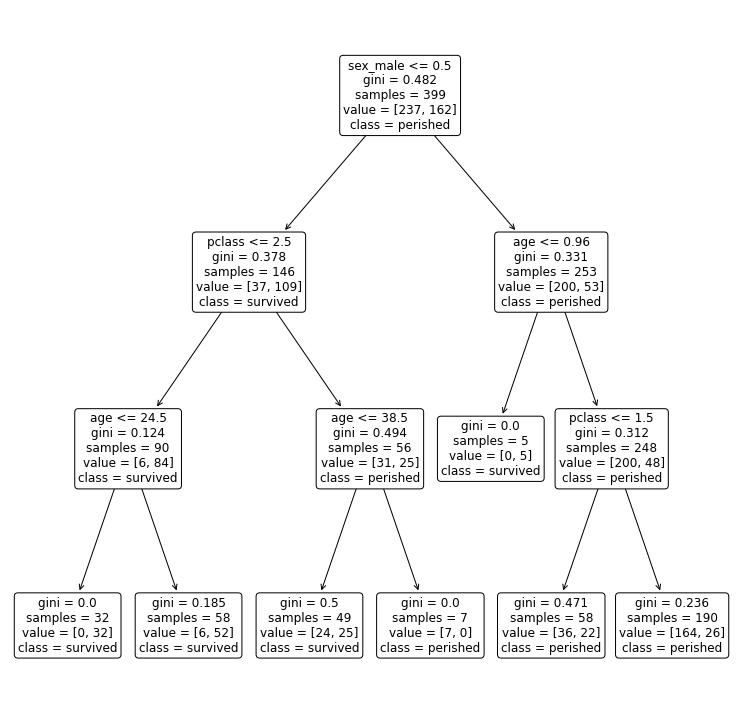

In [9]:
plt.figure(figsize=(13, 13))
plot_tree(clf, feature_names = X_train.columns, class_names = np.array(['perished', 'survived']), rounded=True)

In [10]:
# make predictions using the training data
y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 1, 1, 1, 1])

In [11]:
y_pred_prob = clf.predict_proba(X_train)
y_pred_prob[0:5]

array([[0.86315789, 0.13684211],
       [0.48979592, 0.51020408],
       [0.10344828, 0.89655172],
       [0.10344828, 0.89655172],
       [0.10344828, 0.89655172]])

3. 


Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [12]:
f"Accuracy on train data is {clf.score(X_train, y_train)}"

'Accuracy on train data is 0.8045112781954887'

In [13]:
#make a confusion matrix
pd.DataFrame(metrics.confusion_matrix(y_train, y_pred))

,0,1
0,207,30
1,48,114


In [14]:
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       237
           1       0.79      0.70      0.75       162

    accuracy                           0.80       399
   macro avg       0.80      0.79      0.79       399
weighted avg       0.80      0.80      0.80       399



4.

Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [15]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train, y_pred).ravel()
tn, fp, fn, tp

(207, 30, 48, 114)

In [16]:
#true positive rate

tp/(tp+fn)

0.7037037037037037

In [17]:
# false positive rate

fp/(fp+tp)

0.20833333333333334

In [18]:
# true negative rate

tn/(tn+fp)

0.8734177215189873

In [19]:
# false negative rate

fn/(fn+tp)

0.2962962962962963

In [20]:
# accuracy

(tp+tn)/(tn + fp + fn + tp)

0.8045112781954887

In [21]:
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       237
           1       0.79      0.70      0.75       162

    accuracy                           0.80       399
   macro avg       0.80      0.79      0.79       399
weighted avg       0.80      0.80      0.80       399



5.

Run through steps 2-4 using a different max_depth value.

[Text(362.7, 588.9, 'sex_male <= 0.5\ngini = 0.482\nsamples = 399\nvalue = [237, 162]\nclass = perished'),
 Text(181.35, 353.34, 'pclass <= 2.5\ngini = 0.378\nsamples = 146\nvalue = [37, 109]\nclass = survived'),
 Text(90.675, 117.77999999999997, 'gini = 0.124\nsamples = 90\nvalue = [6, 84]\nclass = survived'),
 Text(272.025, 117.77999999999997, 'gini = 0.494\nsamples = 56\nvalue = [31, 25]\nclass = perished'),
 Text(544.05, 353.34, 'age <= 0.96\ngini = 0.331\nsamples = 253\nvalue = [200, 53]\nclass = perished'),
 Text(453.375, 117.77999999999997, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = survived'),
 Text(634.725, 117.77999999999997, 'gini = 0.312\nsamples = 248\nvalue = [200, 48]\nclass = perished')]

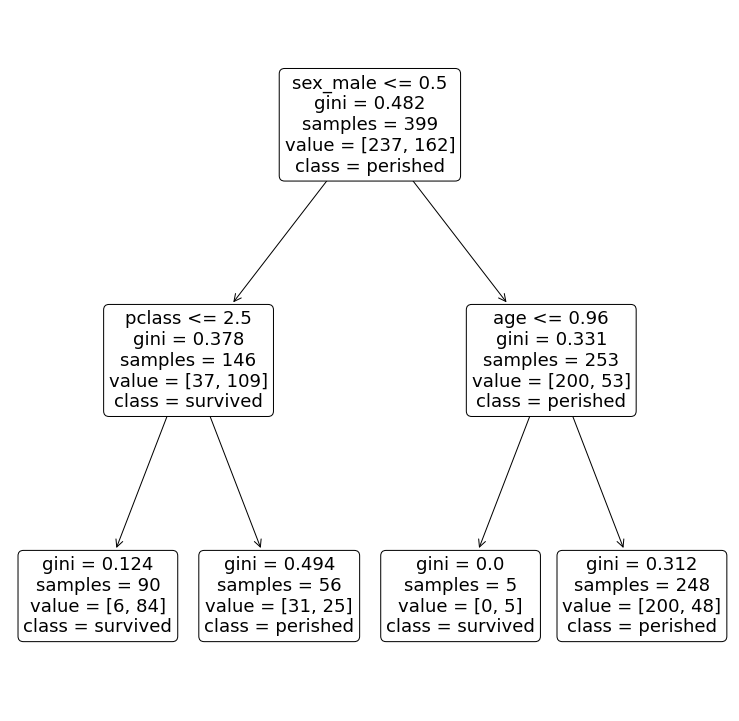

In [22]:
clf2 = DecisionTreeClassifier(max_depth = 2, random_state=123)
clf2 = clf2.fit(X_train, y_train)
plt.figure(figsize=(13, 13))
plot_tree(clf2, feature_names = X_train.columns, class_names = np.array(['perished', 'survived']), rounded=True)

In [23]:
# make predictions using the training data
y_pred2 = clf2.predict(X_train)
y_pred2[0:5]

array([0, 0, 1, 1, 1])

In [24]:
y_pred_prob2 = clf.predict_proba(X_train)
y_pred_prob2[0:5]

array([[0.86315789, 0.13684211],
       [0.48979592, 0.51020408],
       [0.10344828, 0.89655172],
       [0.10344828, 0.89655172],
       [0.10344828, 0.89655172]])

In [25]:
f"Accuracy on train data is {clf2.score(X_train, y_train)}"

'Accuracy on train data is 0.8020050125313283'

In [26]:
pd.DataFrame(metrics.confusion_matrix(y_train, y_pred2))

,0,1
0,231,6
1,73,89


In [27]:
print(metrics.classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85       237
           1       0.94      0.55      0.69       162

    accuracy                           0.80       399
   macro avg       0.85      0.76      0.77       399
weighted avg       0.83      0.80      0.79       399



In [28]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train, y_pred2).ravel()
tn, fp, fn, tp

(231, 6, 73, 89)

In [29]:
#true positive rate

tp/(tp+fn)

0.5493827160493827

In [30]:
# false positive rate

fp/(fp+tp)

0.06315789473684211

In [31]:
# true negative rate

tn/(tn+fp)

0.9746835443037974

In [32]:
# false negative rate

fn/(fn+tp)

0.4506172839506173

In [33]:
# accuracy

(tp+tn)/(tn + fp + fn + tp)

0.8020050125313283

In [34]:
print(metrics.classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85       237
           1       0.94      0.55      0.69       162

    accuracy                           0.80       399
   macro avg       0.85      0.76      0.77       399
weighted avg       0.83      0.80      0.79       399



6.

Which model performs better on your in-sample data?


- Since there is not a high cost to false positive/negative, we can use the f1-score to evaluate the models.  THis means that the first model with a depth of 3 is better at the in-sample data

7.

Which model performs best on your out-of-sample data, the validate set?

In [35]:
X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

- model 1

In [36]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))


Accuracy of Decision Tree classifier on validate set: 0.76


In [37]:
y_pred = clf.predict(X_validate)

print(metrics.classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81        85
           1       0.78      0.55      0.65        58

    accuracy                           0.76       143
   macro avg       0.76      0.72      0.73       143
weighted avg       0.76      0.76      0.75       143



- model 2

In [38]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf2.score(X_validate, y_validate)))


Accuracy of Decision Tree classifier on validate set: 0.77


In [39]:
y_pred2 = clf2.predict(X_validate)

print(metrics.classification_report(y_validate, y_pred2))

              precision    recall  f1-score   support

           0       0.72      0.99      0.84        85
           1       0.96      0.45      0.61        58

    accuracy                           0.77       143
   macro avg       0.84      0.72      0.72       143
weighted avg       0.82      0.77      0.74       143



Both seem pretty similar. model2 seems like a more precise model when predicting survival, so it would be preferred.  In addition, it's overall f1-score is higher, so it might be an overall good middle ground.

### telco data set

In [40]:
df_telco = a.get_telco_data()
telco_train, t_validate, t_test = p.split_telco_data(df_telco)

In [41]:
telco_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 858 to 3756
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            3937 non-null   object 
 1   gender                                 3937 non-null   object 
 2   senior_citizen                         3937 non-null   int64  
 3   partner                                3937 non-null   object 
 4   dependents                             3937 non-null   object 
 5   tenure                                 3937 non-null   int64  
 6   phone_service                          3937 non-null   object 
 7   multiple_lines                         3937 non-null   object 
 8   online_security                        3937 non-null   object 
 9   online_backup                          3937 non-null   object 
 10  device_protection                      3937 non-null   object 
 11  te

make a baseline model

In [42]:
(telco_train.churn == 'Yes').mean()

0.2656845313690627

In [43]:
#most of the customers do not churn. baseline model is no one churns
baseline_prediction = telco_train.churn_Yes.value_counts().idxmax()
baseline_model = pd.Series([baseline_prediction for x in range(telco_train.shape[0])])
baseline_model

0       0
1       0
2       0
3       0
4       0
       ..
3932    0
3933    0
3934    0
3935    0
3936    0
Length: 3937, dtype: int64

baseline prediction is a customer does not churn

In [44]:
pd.DataFrame(metrics.classification_report(telco_train.churn_Yes, baseline_model, labels = [0, 1], output_dict=True)).T


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.734315,1.000000,0.846807,2891.000000
1,0.000000,0.000000,0.000000,1046.000000
accuracy,0.734315,0.734315,0.734315,0.734315
macro avg,0.367158,0.500000,0.423404,3937.000000
weighted avg,0.539219,0.734315,0.621824,3937.000000


baseline accuracy is about 0.73

make a model and fit it to the data


In [45]:
X_telco_train = telco_train.select_dtypes(exclude = 'object').drop(columns = 'churn_Yes')
y_telco_train = telco_train.churn_Yes

clf_telco = DecisionTreeClassifier(max_depth = 2, random_state = 321)

cfl_telco = clf_telco.fit(X_telco_train, y_telco_train)

[Text(418.5, 679.5, 'tenure <= 17.5\ngini = 0.39\nsamples = 3937\nvalue = [2891, 1046]\nclass = no churn'),
 Text(209.25, 407.69999999999993, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.496\nsamples = 1446\nvalue = [787, 659]\nclass = no churn'),
 Text(104.625, 135.89999999999998, 'gini = 0.395\nsamples = 801\nvalue = [584, 217]\nclass = no churn'),
 Text(313.875, 135.89999999999998, 'gini = 0.431\nsamples = 645\nvalue = [203, 442]\nclass = churn'),
 Text(627.75, 407.69999999999993, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.262\nsamples = 2491\nvalue = [2104, 387]\nclass = no churn'),
 Text(523.125, 135.89999999999998, 'gini = 0.115\nsamples = 1368\nvalue = [1284, 84]\nclass = no churn'),
 Text(732.375, 135.89999999999998, 'gini = 0.394\nsamples = 1123\nvalue = [820, 303]\nclass = no churn')]

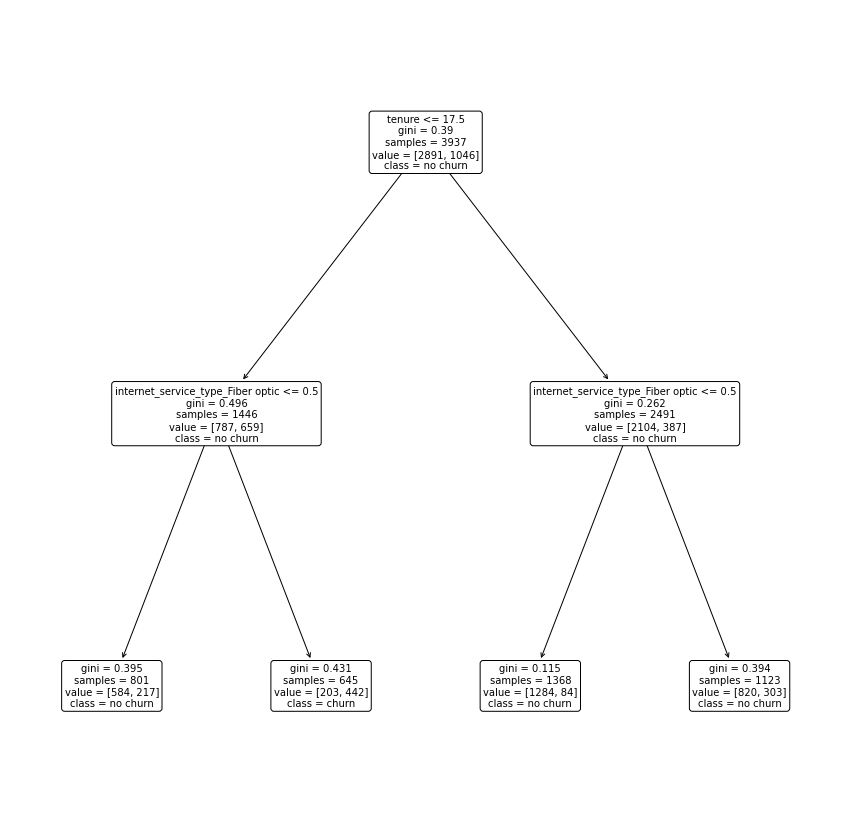

In [46]:
plt.figure(figsize=(15, 15))
plot_tree(clf_telco, feature_names = X_telco_train.columns, class_names = np.array(['no churn', 'churn']), rounded=True)

In [47]:
#predict using the training set
# make predictions using the training data
y_pred_telco = clf_telco.predict(X_telco_train)
y_pred_telco[0:5]

array([0, 0, 1, 0, 0], dtype=uint8)

In [48]:
y_pred_prob_telco = clf_telco.predict_proba(X_telco_train)
y_pred_prob_telco[0:5]

array([[0.72908864, 0.27091136],
       [0.93859649, 0.06140351],
       [0.31472868, 0.68527132],
       [0.93859649, 0.06140351],
       [0.730187  , 0.269813  ]])

In [49]:
#confusion matrix
pd.DataFrame(metrics.confusion_matrix(y_telco_train, y_pred_telco))

,0,1
0,2688,203
1,604,442


In [50]:
y_telco_train.value_counts()

0    2891
1    1046
Name: churn_Yes, dtype: int64

In [51]:
tn, fp, fn, tp = metrics.confusion_matrix(y_telco_train, y_pred_telco).ravel()

tp_rate = tp/(fn+tp)
tn_rate = tn/(fp+tn)
fp_rate = fp/(fp+tp)
fn_rate = fn/(fn+tn)
accuracy = (tp+tn)/(tp+tn+fn+fp)

print(f"tp_rate = {tp_rate}\ntn_rate = {tn_rate}\nfp_rate = {fp_rate}\nfn_rate = {fn_rate}\nacc = {accuracy}")

tp_rate = 0.4225621414913958
tn_rate = 0.9297820823244553
fp_rate = 0.3147286821705426
fn_rate = 0.18347509113001215
acc = 0.7950215900431801


In [52]:
print(metrics.classification_report(y_telco_train, y_pred_telco))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2891
           1       0.69      0.42      0.52      1046

    accuracy                           0.80      3937
   macro avg       0.75      0.68      0.70      3937
weighted avg       0.78      0.80      0.78      3937



In [53]:
f"Accuracy of Decision Tree Classifier on train set: {clf_telco.score(X_telco_train, y_telco_train)}"

'Accuracy of Decision Tree Classifier on train set: 0.7950215900431801'

make a second model with more depth.  maybe this won't overfit because there are so many variables

[Text(583.155737704918, 996.6, 'tenure <= 17.5\ngini = 0.39\nsamples = 3937\nvalue = [2891, 1046]\nclass = no churn'),
 Text(292.72131147540983, 815.4000000000001, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.496\nsamples = 1446\nvalue = [787, 659]\nclass = no churn'),
 Text(146.36065573770492, 634.2, 'tenure <= 3.5\ngini = 0.395\nsamples = 801\nvalue = [584, 217]\nclass = no churn'),
 Text(73.18032786885246, 453.0, 'online_backup_No internet service <= 0.5\ngini = 0.481\nsamples = 325\nvalue = [194, 131]\nclass = no churn'),
 Text(36.59016393442623, 271.79999999999995, 'total_charges <= 193.5\ngini = 0.497\nsamples = 183\nvalue = [85, 98]\nclass = churn'),
 Text(18.295081967213115, 90.59999999999991, 'gini = 0.494\nsamples = 177\nvalue = [79, 98]\nclass = churn'),
 Text(54.885245901639344, 90.59999999999991, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = no churn'),
 Text(109.77049180327869, 271.79999999999995, 'total_charges <= 20.175\ngini = 0.357\nsamples = 142\nvalue = [

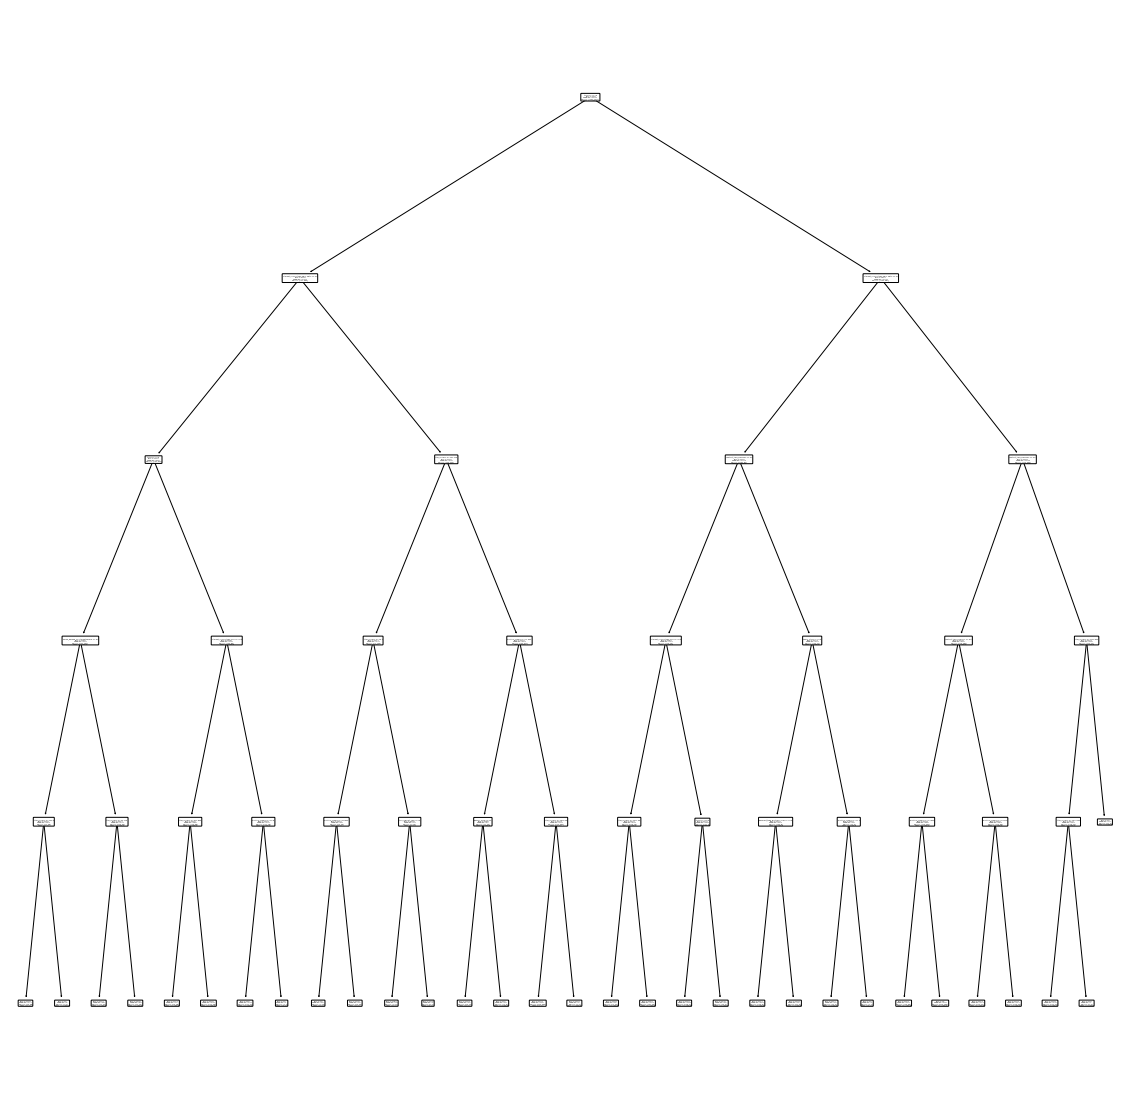

In [54]:
clf_telco2 = DecisionTreeClassifier(max_depth = 5, random_state=321)

clf_telco2 = clf_telco2.fit(X_telco_train, y_telco_train)

plt.figure(figsize=(20,20))
plot_tree(clf_telco2, feature_names = X_telco_train.columns, class_names = np.array(['no churn', 'churn']), rounded=True)

In [55]:
#now evaluate the model over the train set
y_pred_telco2 = clf_telco2.predict(X_telco_train)
pd.Series(y_pred_telco2)

0       0
1       0
2       1
3       0
4       0
       ..
3932    0
3933    0
3934    0
3935    1
3936    0
Length: 3937, dtype: uint8

In [56]:
y_pred_prob_telco2 = clf_telco2.predict_proba(X_telco_train)
y_pred_prob_telco2[0:5]

array([[0.91237113, 0.08762887],
       [0.99119718, 0.00880282],
       [0.33180778, 0.66819222],
       [0.99119718, 0.00880282],
       [0.71974522, 0.28025478]])

In [57]:
pd.DataFrame(metrics.confusion_matrix(y_telco_train, y_pred_telco2))

,0,1
0,2637,254
1,515,531


In [58]:
tn, fp, fn, tp = metrics.confusion_matrix(y_telco_train, y_pred_telco2).ravel()

tp_rate = tp/(fn+tp)
tn_rate = tn/(fp+tn)
fp_rate = fp/(fp+tp)
fn_rate = fn/(fn+tn)
accuracy = (tp+tn)/(tp+tn+fn+fp)

print(f"tp_rate = {tp_rate}\ntn_rate = {tn_rate}\nfp_rate = {fp_rate}\nfn_rate = {fn_rate}\nacc = {accuracy}")

tp_rate = 0.5076481835564054
tn_rate = 0.9121411276374957
fp_rate = 0.3235668789808917
fn_rate = 0.16338832487309646
acc = 0.8046736093472187


In [59]:
f"Accuracy of Decision Tree Model 2: {clf_telco2.score(X_telco_train, y_telco_train)}"

'Accuracy of Decision Tree Model 2: 0.8046736093472187'

In [60]:
print(metrics.classification_report(y_telco_train, y_pred_telco2))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      2891
           1       0.68      0.51      0.58      1046

    accuracy                           0.80      3937
   macro avg       0.76      0.71      0.73      3937
weighted avg       0.79      0.80      0.79      3937



now make predictions with validate data

In [61]:
#make a validate set

X_telco_val = t_validate.select_dtypes(exclude= 'object').drop(columns='churn_Yes')
y_telco_val = t_validate.churn_Yes

In [62]:
#make predictions and spit out the accuracy and classification report

models = [clf_telco, clf_telco2]
for i, model in enumerate(models):
    print("===========================================================")
    print(f"model {i+1}")
    print(f"Accuracy of decision tree {i+1} on validate: {model.score(X_telco_val, y_telco_val)}")
    y_pred = model.predict(X_telco_val)
    print(metrics.classification_report(y_telco_val, y_pred))
    

model 1
Accuracy of decision tree 1 on validate: 0.7839374555792467
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1033
           1       0.67      0.37      0.48       374

    accuracy                           0.78      1407
   macro avg       0.74      0.65      0.67      1407
weighted avg       0.77      0.78      0.76      1407

model 2
Accuracy of decision tree 2 on validate: 0.7917555081734187
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1033
           1       0.66      0.46      0.54       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



We probably want to optimize recall on using churn as the positive case (since churn is so costly, it makes sense to try to keep as many customers as possible).  In this, the second model is better.

## random forest exs

with titanic data set

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
t_train, t_validate, t_test = p.split_titanic_data(a.get_titanic_data())
t_train

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
316,1,2,24.0,1,0,26.0000,0,0,0,1
329,1,1,16.0,0,1,57.9792,0,0,0,0
550,1,1,17.0,0,2,110.8833,0,1,0,0
363,0,3,35.0,0,0,7.0500,1,1,0,1
477,0,3,29.0,1,0,7.0458,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
788,1,3,1.0,1,2,20.5750,0,1,0,1
326,0,3,61.0,0,0,6.2375,1,1,0,1
288,1,2,42.0,0,0,13.0000,1,1,0,1
403,0,3,28.0,1,0,15.8500,0,1,0,1


1.


Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [65]:
# seperate out target variable
X_titanic_train = t_train.drop(columns=['survived'])
y_titanic_train = t_train.survived

X_validate = t_validate.drop(columns=['survived'])
y_validate = t_validate.survived

X_test = t_test.drop(columns=['survived'])
y_test = t_test.survived

In [66]:
baseline = y_titanic_train.mode()
baseline

0    0
dtype: int64

In [67]:
# train the model
rf = RandomForestClassifier(min_samples_leaf = 1, max_depth=10, random_state=135)
rf = rf.fit(X_titanic_train, y_titanic_train)
rf

RandomForestClassifier(max_depth=10, random_state=135)

In [68]:
# make predictions
y_pred = rf.predict(X_titanic_train)
y_pred[0:10]

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0])

In [69]:
y_pred_proba = rf.predict_proba(X_titanic_train)
y_pred_proba[0:10]

array([[0.13644877, 0.86355123],
       [0.03666667, 0.96333333],
       [0.28878571, 0.71121429],
       [0.9704651 , 0.0295349 ],
       [0.95970713, 0.04029287],
       [0.0118638 , 0.9881362 ],
       [0.90092676, 0.09907324],
       [0.88238068, 0.11761932],
       [0.987     , 0.013     ],
       [0.71864299, 0.28135701]])

2.

Evaluate your results using the model score, confusion matrix, and classification report.

In [70]:
print(f"accuracy of random forest model: {rf.score(X_titanic_train, y_titanic_train)}")

accuracy of random forest model: 0.9649122807017544


In [71]:
# confusion matrix
pd.DataFrame(metrics.confusion_matrix(y_titanic_train, y_pred))

,0,1
0,237,0
1,14,148


In [72]:
#classification report
pd.DataFrame(metrics.classification_report(y_titanic_train, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.944223,1.000000,0.971311,237.000000
1,1.000000,0.913580,0.954839,162.000000
accuracy,0.964912,0.964912,0.964912,0.964912
macro avg,0.972112,0.956790,0.963075,399.000000
weighted avg,0.966869,0.964912,0.964623,399.000000


3.

Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [73]:
tn, fp, fn, tp = metrics.confusion_matrix(y_titanic_train, y_pred).ravel()

tp_rate = tp/(fn+tp)
tn_rate = tn/(fp+tn)
fp_rate = fp/(fp+tp)
fn_rate = fn/(fn+tn)
accuracy = (tp+tn)/(tp+tn+fn+fp)

print(f"tp_rate = {tp_rate}\ntn_rate = {tn_rate}\nfp_rate = {fp_rate}\nfn_rate = {fn_rate}\nacc = {accuracy}")

tp_rate = 0.9135802469135802
tn_rate = 1.0
fp_rate = 0.0
fn_rate = 0.055776892430278883
acc = 0.9649122807017544


In [74]:
pd.DataFrame(metrics.classification_report(y_titanic_train, y_pred, output_dict=True)).T[['f1-score']]

,f1-score
0,0.971311
1,0.954839
accuracy,0.964912
macro avg,0.963075
weighted avg,0.964623


In [75]:
pd.DataFrame(metrics.classification_report(y_titanic_train, y_pred, output_dict=True)).T[['support']]

,support
0,237.000000
1,162.000000
accuracy,0.964912
macro avg,399.000000
weighted avg,399.000000


4.

Run through steps increasing your min_samples_leaf and decreasing your max_depth. 

In [93]:
depths = list(range(1, 11))
leafs = list(reversed(depths))
values = {'depths':depths, 'leafs':leafs}
for i in range(len(depths)):
    print(f"=====model{i}=====")
    print(f"min_samples_leaf = {values['leafs'][i]} : max_depth = {values['depths'][i]}")
    rf = RandomForestClassifier(min_samples_leaf = values['leafs'][i], max_depth=values['depths'][i], random_state=135)
    rf = rf.fit(X_titanic_train, y_titanic_train)
    y_pred = rf.predict(X_titanic_train)
    tn, fp, fn, tp = metrics.confusion_matrix(y_titanic_train, y_pred).ravel()
    tp_rate = tp/(fn+tp)
    tn_rate = tn/(fp+tn)
    fp_rate = fp/(fp+tp)
    fn_rate = fn/(fn+tn)
    accuracy = (tp+tn)/(tp+tn+fn+fp)
    print(f"tp_rate = {tp_rate}\ntn_rate = {tn_rate}\nfp_rate = {fp_rate}\nfn_rate = {fn_rate}\nacc = {accuracy}")
    print(f"accuracy of random forest model: {rf.score(X_titanic_train, y_titanic_train)}")
    print(pd.DataFrame(metrics.classification_report(y_titanic_train, y_pred, output_dict=True)).T)
    print()

=====model0=====
min_samples_leaf = 10 : max_depth = 1
tp_rate = 0.6481481481481481
tn_rate = 0.8776371308016878
fp_rate = 0.21641791044776118
fn_rate = 0.21509433962264152
acc = 0.7844611528822055
accuracy of random forest model: 0.7844611528822055
              precision    recall  f1-score     support
0              0.784906  0.877637  0.828685  237.000000
1              0.783582  0.648148  0.709459  162.000000
accuracy       0.784461  0.784461  0.784461    0.784461
macro avg      0.784244  0.762893  0.769072  399.000000
weighted avg   0.784368  0.784461  0.780278  399.000000

=====model1=====
min_samples_leaf = 9 : max_depth = 2
tp_rate = 0.6234567901234568
tn_rate = 0.9071729957805907
fp_rate = 0.17886178861788618
fn_rate = 0.2210144927536232
acc = 0.7919799498746867
accuracy of random forest model: 0.7919799498746867
              precision    recall  f1-score    support
0              0.778986  0.907173  0.838207  237.00000
1              0.821138  0.623457  0.708772  162.00000


In [77]:
metrics.classification_report(y_titanic_train, y_pred, output_dict=True)

{'0': {'precision': 0.9442231075697212,
  'recall': 1.0,
  'f1-score': 0.9713114754098361,
  'support': 237},
 '1': {'precision': 1.0,
  'recall': 0.9135802469135802,
  'f1-score': 0.9548387096774192,
  'support': 162},
 'accuracy': 0.9649122807017544,
 'macro avg': {'precision': 0.9721115537848606,
  'recall': 0.9567901234567902,
  'f1-score': 0.9630750925436277,
  'support': 399},
 'weighted avg': {'precision': 0.9668693646466765,
  'recall': 0.9649122807017544,
  'f1-score': 0.9646232848117119,
  'support': 399}}

5.

What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [78]:
#assume that survive is the positive case
depths = list(range(1, 11)) + list(range(1, 11))
leafs = list(range(10, 0, -1)) + list(range(1, 11))
values = {'depths':depths, 'leafs':leafs}
outputs = []
for i in range(len(depths)):
    rf = RandomForestClassifier(min_samples_leaf = values['leafs'][i], max_depth=values['depths'][i], random_state=135)
    rf = rf.fit(X_titanic_train, y_titanic_train)
    y_pred = rf.predict(X_titanic_train)
    metrics_dict = metrics.classification_report(y_titanic_train, y_pred, output_dict=True)
    output = {
        'min_samples_leaf':values['leafs'][i],
        'max_depth':values['depths'][i],
        'accuracy':rf.score(X_titanic_train, y_titanic_train),
        'precision':metrics_dict['1']['precision'],
        'recall':metrics_dict['1']['recall']
    }
    outputs.append(output)

In [79]:
leafs[5]

5

In [80]:
modeltrain_df = pd.DataFrame(outputs)
modeltrain_df

,min_samples_leaf,max_depth,accuracy,precision,recall
0,10,1,0.784461,0.783582,0.648148
1,9,2,0.791980,0.821138,0.623457
2,8,3,0.817043,0.861789,0.654321
3,7,4,0.847118,0.879699,0.722222
4,6,5,0.849624,0.880597,0.728395
5,5,6,0.867168,0.897810,0.759259
6,4,7,0.882206,0.919708,0.777778
7,3,8,0.889724,0.927536,0.790123
8,2,9,0.912281,0.944056,0.833333
9,1,10,0.964912,1.000000,0.913580


After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [81]:
#now evaluate on validate:
#assume that survive is the positive case
depths = list(range(1, 11)) + list(range(1, 11))
leafs = list(range(10, 0, -1)) + list(range(1, 11))
values = {'depths':depths, 'leafs':leafs}
outputs = []
for i in range(len(depths)):
    rf = RandomForestClassifier(min_samples_leaf = values['leafs'][i], max_depth=values['depths'][i], random_state=135)
    rf = rf.fit(X_titanic_train, y_titanic_train)
    y_pred = rf.predict(X_validate)
    metrics_dict = metrics.classification_report(y_validate, y_pred, output_dict=True)
    output = {
        'min_samples_leaf':values['leafs'][i],
        'max_depth':values['depths'][i],
        'accuracy':rf.score(X_validate, y_validate),
        'precision':metrics_dict['1']['precision'],
        'recall':metrics_dict['1']['recall']
    }
    outputs.append(output)

In [82]:
modelvalidate_df = pd.DataFrame(outputs)
modelvalidate_df

,min_samples_leaf,max_depth,accuracy,precision,recall
0,10,1,0.741259,0.733333,0.568966
1,9,2,0.755245,0.767442,0.568966
2,8,3,0.762238,0.785714,0.568966
3,7,4,0.790210,0.769231,0.689655
4,6,5,0.783217,0.754717,0.689655
5,5,6,0.790210,0.769231,0.689655
6,4,7,0.804196,0.800000,0.689655
7,3,8,0.797203,0.784314,0.689655
8,2,9,0.797203,0.773585,0.706897
9,1,10,0.804196,0.777778,0.724138


In [83]:
#consider the difference in accuracy between train and validate for each model
comparemodel_df = modelvalidate_df[['min_samples_leaf', 'max_depth']]
comparemodel_df['validate_acc'] = modelvalidate_df[['accuracy']]
comparemodel_df['train_acc'] = modeltrain_df[['accuracy']]
comparemodel_df['difference'] = comparemodel_df['train_acc'] - comparemodel_df['validate_acc']
comparemodel_df

/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_32056/3307010481.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparemodel_df['validate_acc'] = modelvalidate_df[['accuracy']]
/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_32056/3307010481.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparemodel_df['train_acc'] = modeltrain_df[['accuracy']]


,min_samples_leaf,max_depth,validate_acc,train_acc,difference
0,10,1,0.741259,0.784461,0.043202
1,9,2,0.755245,0.791980,0.036735
2,8,3,0.762238,0.817043,0.054805
3,7,4,0.790210,0.847118,0.056908
4,6,5,0.783217,0.849624,0.066407
5,5,6,0.790210,0.867168,0.076958
6,4,7,0.804196,0.882206,0.078010
7,3,8,0.797203,0.889724,0.092522
8,2,9,0.797203,0.912281,0.115078
9,1,10,0.804196,0.964912,0.160716


It looks like model 13, with min_samples_leaf = 4 and max_depth = 4, but all beat a baseline of ~0.5.

## make one for telco data


In [84]:
df_telco = a.get_telco_data()
telco_train, t_validate, t_test = p.split_telco_data(df_telco)

telco_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 2044 to 4965
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            3937 non-null   object 
 1   gender                                 3937 non-null   object 
 2   senior_citizen                         3937 non-null   int64  
 3   partner                                3937 non-null   object 
 4   dependents                             3937 non-null   object 
 5   tenure                                 3937 non-null   int64  
 6   phone_service                          3937 non-null   object 
 7   multiple_lines                         3937 non-null   object 
 8   online_security                        3937 non-null   object 
 9   online_backup                          3937 non-null   object 
 10  device_protection                      3937 non-null   object 
 11  t

In [98]:
X_telco_train = telco_train.select_dtypes(exclude= 'object').drop(columns=['churn_Yes'])
y_telco_train = telco_train['churn_Yes']

X_telco_val = t_validate.select_dtypes(exclude= 'object').drop(columns=['churn_Yes'])
y_telco_val = t_validate.churn_Yes

In [103]:
#assume that churn is the positive case
#doesn't like max_depth = 1; need to use zero_division=True for classification_report
depths = list(range(2, 6)) + list(range(2, 6))
leafs = list(range(5, 1, -1)) + list(range(2, 6))
values = {'depths':depths, 'leafs':leafs}
outputs = []
for i in range(len(depths)):
    rf = RandomForestClassifier(min_samples_leaf = values['leafs'][i], max_depth=values['depths'][i], random_state=135)
    rf = rf.fit(X_telco_train, y_telco_train)
    y_pred = rf.predict(X_telco_train)
    metrics_dict = metrics.classification_report(y_telco_train, y_pred, output_dict=True, zero_division=False)
    output = {
        'min_samples_leaf':values['leafs'][i],
        'max_depth':values['depths'][i],
        'accuracy':rf.score(X_telco_train, y_telco_train),
        'precision':metrics_dict['1']['precision'],
        'recall':metrics_dict['1']['recall']
    }
    outputs.append(output)

In [104]:
pd.DataFrame(outputs)

,min_samples_leaf,max_depth,accuracy,precision,recall
0,5,2,0.735585,0.692308,0.008604
1,4,3,0.783084,0.747423,0.277247
2,3,4,0.792736,0.680251,0.414914
3,2,5,0.800864,0.687679,0.458891
4,2,2,0.735585,0.692308,0.008604
5,3,3,0.783084,0.747423,0.277247
6,4,4,0.792736,0.680818,0.413958
7,5,5,0.801118,0.686525,0.462715


## KNN algorithm

In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [111]:
t_train, t_validate, t_test = p.split_titanic_data(a.get_titanic_data())
t_train.sample(5)

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
135,0,2,23.0,0,0,15.0458,1,1,0,0
452,0,1,30.0,0,0,27.7500,1,1,0,0
713,0,3,29.0,0,0,9.4833,1,1,0,1
239,0,2,33.0,0,0,12.2750,1,1,0,1
278,0,3,7.0,4,1,29.1250,0,1,1,0


In [112]:
X_train = t_train.drop(columns='survived')
y_train = t_train.survived

1.


Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [113]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn = knn.fit(X_train, y_train)
knn

KNeighborsClassifier()

In [115]:
y_pred = knn.predict(X_train)
y_pred[0:10]

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 1])

2.

Evaluate your results using the model score, confusion matrix, and classification report.

In [117]:
f"Accuracy of model with k = 5 : {knn.score(X_train, y_train)}"

'Accuracy of model with k = 5 : 0.7744360902255639'

In [118]:
pd.DataFrame(metrics.confusion_matrix(y_train, y_pred))

,0,1
0,199,38
1,52,110


In [121]:
pd.DataFrame(metrics.classification_report(y_train, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.792829,0.839662,0.815574,237.000000
1,0.743243,0.679012,0.709677,162.000000
accuracy,0.774436,0.774436,0.774436,0.774436
macro avg,0.768036,0.759337,0.762626,399.000000
weighted avg,0.772696,0.774436,0.772578,399.000000


3.

Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [122]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train, y_pred).ravel()

tp_rate = tp/(fn+tp)
tn_rate = tn/(fp+tn)
fp_rate = fp/(fp+tp)
fn_rate = fn/(fn+tn)
accuracy = (tp+tn)/(tp+tn+fn+fp)

print(f"tp_rate = {tp_rate}\ntn_rate = {tn_rate}\nfp_rate = {fp_rate}\nfn_rate = {fn_rate}\nacc = {accuracy}")

tp_rate = 0.6790123456790124
tn_rate = 0.8396624472573839
fp_rate = 0.25675675675675674
fn_rate = 0.20717131474103587
acc = 0.7744360902255639


In [128]:
class_report = pd.DataFrame(metrics.classification_report(y_train, y_pred, output_dict=True)).T
class_report[['precision']]

,precision
0,0.792829
1,0.743243
accuracy,0.774436
macro avg,0.768036
weighted avg,0.772696


In [129]:
class_report[['recall']]

,recall
0,0.839662
1,0.679012
accuracy,0.774436
macro avg,0.759337
weighted avg,0.774436


In [130]:
class_report[['f1-score']]

,f1-score
0,0.815574
1,0.709677
accuracy,0.774436
macro avg,0.762626
weighted avg,0.772578


In [131]:
class_report[['support']]

,support
0,237.000000
1,162.000000
accuracy,0.774436
macro avg,399.000000
weighted avg,399.000000


4.

Run through steps 2-4 setting k to 10

5.

Run through setps 2-4 setting k to 20

In [133]:
metrics.classification_report(y_train, y_pred, output_dict=True)

{'0': {'precision': 0.7333333333333333,
  'recall': 0.8818565400843882,
  'f1-score': 0.8007662835249042,
  'support': 237},
 '1': {'precision': 0.7543859649122807,
  'recall': 0.5308641975308642,
  'f1-score': 0.6231884057971014,
  'support': 162},
 'accuracy': 0.7393483709273183,
 'macro avg': {'precision': 0.743859649122807,
  'recall': 0.7063603688076262,
  'f1-score': 0.7119773446610028,
  'support': 399},
 'weighted avg': {'precision': 0.7418810183353118,
  'recall': 0.7393483709273183,
  'f1-score': 0.7286669948233903,
  'support': 399}}

In [148]:
#assume the survival is the positive case
outputs = []
for k in range(2, 22, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    metrics_dict = metrics.classification_report(y_train, y_pred, output_dict=True)
    output = {
        'k':k,
        'accuracy':knn.score(X_train, y_train),
        'recall': metrics_dict['1']['recall'],
        'precision': metrics_dict['1']['precision']
    }
    outputs.append(output)

In [149]:
pd.DataFrame(outputs)

,k,accuracy,recall,precision
0,2,0.832080,0.586420,1.000000
1,4,0.791980,0.586420,0.855856
2,6,0.759398,0.561728,0.784483
3,8,0.759398,0.561728,0.784483
4,10,0.751880,0.543210,0.778761
5,12,0.749373,0.543210,0.771930
6,14,0.759398,0.555556,0.789474
7,16,0.744361,0.524691,0.772727
8,18,0.739348,0.530864,0.754386
9,20,0.731830,0.543210,0.727273


6.

What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?